<a href="https://colab.research.google.com/github/sipocz/Zindi/blob/main/Zindi_231018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/jtext-103/jddb.git


Cloning into 'jddb'...
remote: Enumerating objects: 1910, done.
remote: Counting objects: 100% (1910/1910), done.
remote: Compressing objects: 100% (750/750), done.
remote: Total 1910 (delta 946), reused 1895 (delta 931), pack-reused 0
Receiving objects: 100% (1910/1910), 1.13 MiB | 8.73 MiB/s, done.
Resolving deltas: 100% (946/946), done.


In [6]:
!cd jddb
!pip install ./jddb/code/JDDB/.

Processing ./jddb/code/JDDB
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.3/671.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 15.0 MB/s eta 0:00:00
  Created wheel for jddb: filename=jddb-0.1.0-py3-none-any.whl size=23034 sha256=c31ac95ea42b8c695ff9c235cba9af00d24dfc70de74159ad4ecedecab19f9f8
  Stored in directory: /tmp/pip-ephem-wheel-cache-a1bqb9_t/wheels/1a/de/3e/3b0a090f3e1057f34afb37e06d54aa9a9d2c95885632227c26
Successfully built jddb


In [8]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)




Mounted at /content/gdrive


In [9]:
root_dir = "/content/gdrive/My Drive/zindi"

In [10]:
fname="/content/gdrive/MyDrive/zindi/HL-2A_data.zip"

In [13]:
!unzip $fname

Archive:  /content/gdrive/MyDrive/zindi/HL-2A_data.zip
  inflating: HL-2A data/HL-2A_Data.rar  
  inflating: HL-2A data/basic_processor.py  
  inflating: HL-2A data/basic_data_handling.py  
  inflating: HL-2A data/Demo of disruption prediction in HL-2A.ipynb  


In [22]:
rar_fname="/content/HL-2Adata/HL-2A_Data.rar"

In [23]:
!unrar x $rar_fname


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/HL-2Adata/HL-2A_Data.rar

Creating    JDDB_repo_2A_5k                                           OK
Extracting  JDDB_repo_2A_5k/35956.hdf5                                     0%  OK 
Extracting  JDDB_repo_2A_5k/35957.hdf5                                     0%  OK 
Extracting  JDDB_repo_2A_5k/35958.hdf5                                     0%  OK 
Extracting  JDDB_repo_2A_5k/35959.hdf5                                     0%  OK 
Extracting  JDDB_repo_2A_5k/35960.hdf5                                     0%  OK 
Extracting  JDDB_repo_2A_5k/35961.hdf5                                     0%  OK 
Extracting  JDDB_repo_2A_5k/35962.hdf5                                     0%  OK 
Extracting  JDDB_repo_2A_5k/35963.hdf5                                     0%  OK 
Extracting  JDDB_repo_2A_5k/35964.hdf5                          

In [24]:
import os

dataset_path = './JDDB_repo_2A_5k'
file_list = os.listdir(dataset_path)
print(file_list[:5])

['36371.hdf5', '36405.hdf5', '36188.hdf5', '37045.hdf5', '36072.hdf5']


{'DS-SXR-SXA:SX19', 'CCO-LFB:LFBBV', 'CCO-LFB:LFEX-IP', 'DS-SXR-SXA:SX13', 'DS-EMD-MP:MPOL-10', 'DS-EMD-ROG:VL-FILTER', 'DS-EMD-MP:NPOL-05', 'DS-SXR-SXA:SX06', 'DS-BM-AB:BOLD02', 'DS-EMD-MP:MPOL-17', 'DS-FIR:FIR-SPH1A', 'DS-BM-AB:BOLD15', 'DS-EMD-MP:MPOL-03', 'DS-BM-AB:BOLD04', 'DS-SXR-SXA:SX12', 'DS-SXR-SXA:SX14', 'DS-BM-AB:BOLD08', 'EFIT_q95', 'CCO-LFB:LFBMP1', 'DS-BM-AB:BOLD11', 'GW_Ratio', 'CCO-LFB:LFDV', 'DS-EMD-MP:MPOL-07', 'DS-EMD-MP:MPOL-14', 'DS-SXR-SXA:SX03', 'DS-BM-AB:BOLD06', 'DS-EMD-MP:MPOL-06', 'DS-BM-AB:BOLD13', 'DS-BM-AB:BOLD16', 'DS-SXR-SXA:SX15', 'DS-SXR-SXA:SX04', 'DS-EMD-MP:MPOL-16', 'DS-EMD-MP:NPOL-01', 'DS-FIR:FIR-SPH4A', 'CCO-LFB:LFBIRF', 'CCO-LFB:LFBBT', 'DS-SXR-SXA:SX16', 'DS-EMD-MP:NPOL-02', 'DS-BM-AB:BOLD01', 'DS-BM-AB:BOLD07', 'DS-EMD-MP:NPOL-03', 'CCO-DF:DENSITY1', 'DS-SXR-SXA:SX18', 'DS-TMP:PUFFCTRL', 'DS-BM-AB:BOLD14', 'DS-SXR-SXA:SX07', 'DS-EMD-MP:MPOL-04', 'DS-SXR-SXA:SX08', 'DS-SXR-SXA:SX17', 'CCO-DF:GASFBOUT', 'DS-BM-AB:BOLD03', 'DS-SXR-SXA:SX10', 'DS

Text(0.5, 0, 'Time(s)')

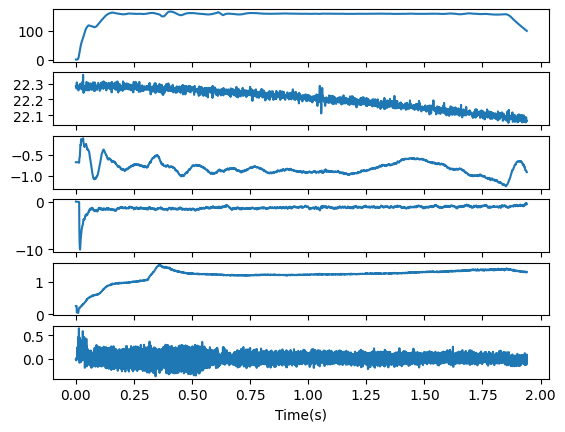

In [25]:
from jddb.file_repo import FileRepo
from jddb.processor import Shot
import numpy as np
import matplotlib.pyplot as plt

# load file repo
file_repo = FileRepo(r"./JDDB_repo_2A_5k")

# select a shot id in the file repo, see which signals are given in this shot
shot_list = file_repo.get_all_shots()
shot_id = shot_list[169]
example_shot = Shot(shot_id, file_repo)
print(example_shot.tags)

# plot some basic plasma parameters
# CCO-LFB:LFEX-IP     |      plasma current(kA)
# CCO-LFB:LFBBT       |      current in toroidal magnetic field coild(kA), can be conveted into field intensity by timing 0.0622T/kA
# CCO-LFB:LFDH        |      horizontal displacement of plasma (i.e.)
# CCO-LFB:LFDV        |      vertical displacement of plasma (i.e.)
# CO-DF:DENSITY1      |      plasma density(10e19/m^3)
# DS-EMD-MP:MPOL-04     |      magnetic perturbation measured by Mirnov porbe
plot_tags = ["CCO-LFB:LFEX-IP", "CCO-LFB:LFBBT", "CCO-LFB:LFDH", "CCO-LFB:LFDV", "CCO-DF:DENSITY1", "DS-EMD-MP:MPOL-04"]
f, axs = plt.subplots(nrows=6, ncols=1, sharex=True)
axs = np.reshape(axs, -1)
for i, tag in enumerate(plot_tags):
    if example_shot.labels[tag] == 1:
        data = example_shot.get_signal(tag)
        axs[i].plot(data.time, data.data)
axs[i].set_xlabel('Time(s)')